In [32]:
import numpy as np
from scipy.integrate import solve_ivp
import pylab as pl

%matplotlib inline
pl.style.use('latexplot')

In [37]:
# Parameter Values
beta_I = 0.147
# Assuming asymptomatic carriers are less contagious due to the lack of symptom, we consider a lower value
beta_A = 0.1
# After detection, a symptomatic carrier is less likely to spread the disease:
beta_DI = 0.06
# This would be even lower considering asymptomatic cases:
beta_DA = 0.04

# E to I/A:
p_a     = 0.2
sigma   = 1/5.2
sigma_D = 1/5.2

# Assuming that all carriers take the same amount of time to recover
gamma_I = 1/12.39
gamma_A = 1/12.39
gamma_DI = 1/12.39
gamma_DA = 1/12.39

# We assume a much lower death rate for asymptomatic carriers since they are likely young
mu_I = 0.0004
mu_A = 0.00001
mu_DI = 0.0004
mu_DA = 0.00001

# For testing(it is easier to test for symptomatic individuals):
theta_E = 0.01
psi_E   = 0.95
theta_I = 0.03
psi_I   = 1
theta_A = 0.01
psi_A   = 0.95

# Rate of re-susceptibility:
xi = 0.0001

# Initial Values in the Population:
S_init = 990000
A_init = 2000
I_init = 8000
# Total Living Population:
N = S_init + I_init

In [38]:
def deterministic_model(t, y):
    S, E, A, I, D_E, D_I, D_A, F, R = y
    
    N    = S + E + A + I + D_E + D_I + D_A + R
    Sdot = -(beta_I*S*I) / N - (beta_A*S*A) / N \
           -(beta_DI*S*D_I) / N -(beta_DA*S*D_A) / N + xi * R
    
    Edot =  (beta_I*S*I) / N + (beta_A*S*A) / N \
           +(beta_DI*S*D_I) / N +(beta_DA*S*D_A) / N \
           - sigma * E - theta_E * psi_E * E 
    
    Adot =   sigma * p_a * E - gamma_A * A - mu_A * A \
           - theta_A * psi_A * A
    
    Idot = sigma*(1 - p_a)*E - gamma_I * I - mu_I*I - theta_I * psi_I * I
    
    DEdot = theta_E * psi_E * E - sigma_D * D_E
    DAdot = theta_A * psi_A * A + sigma_D * p_a * D_E - gamma_DA * D_A - mu_DA * D_A
    DIdot = theta_I * psi_I * I + sigma_D * (1 - p_a) * D_E - gamma_DI * D_I - mu_DI * D_I
    
    Fdot = mu_I*I + mu_A * A + mu_DI * D_I + mu_DA * D_A
    Rdot = gamma_I * I + gamma_A * A + gamma_DI * D_I + gamma_DA * D_A - xi*R

    return(Sdot, Edot, Adot, Idot, DEdot, DAdot, DIdot, Fdot, Rdot)

In [39]:
t_final = 200
t_eval  = np.arange(0, t_final)
init    = [S_init, 0, A_init, I_init, 0, 0, 0, 0, 0]
sol     = solve_ivp(deterministic_model, (0, t_final), init, t_eval = t_eval)

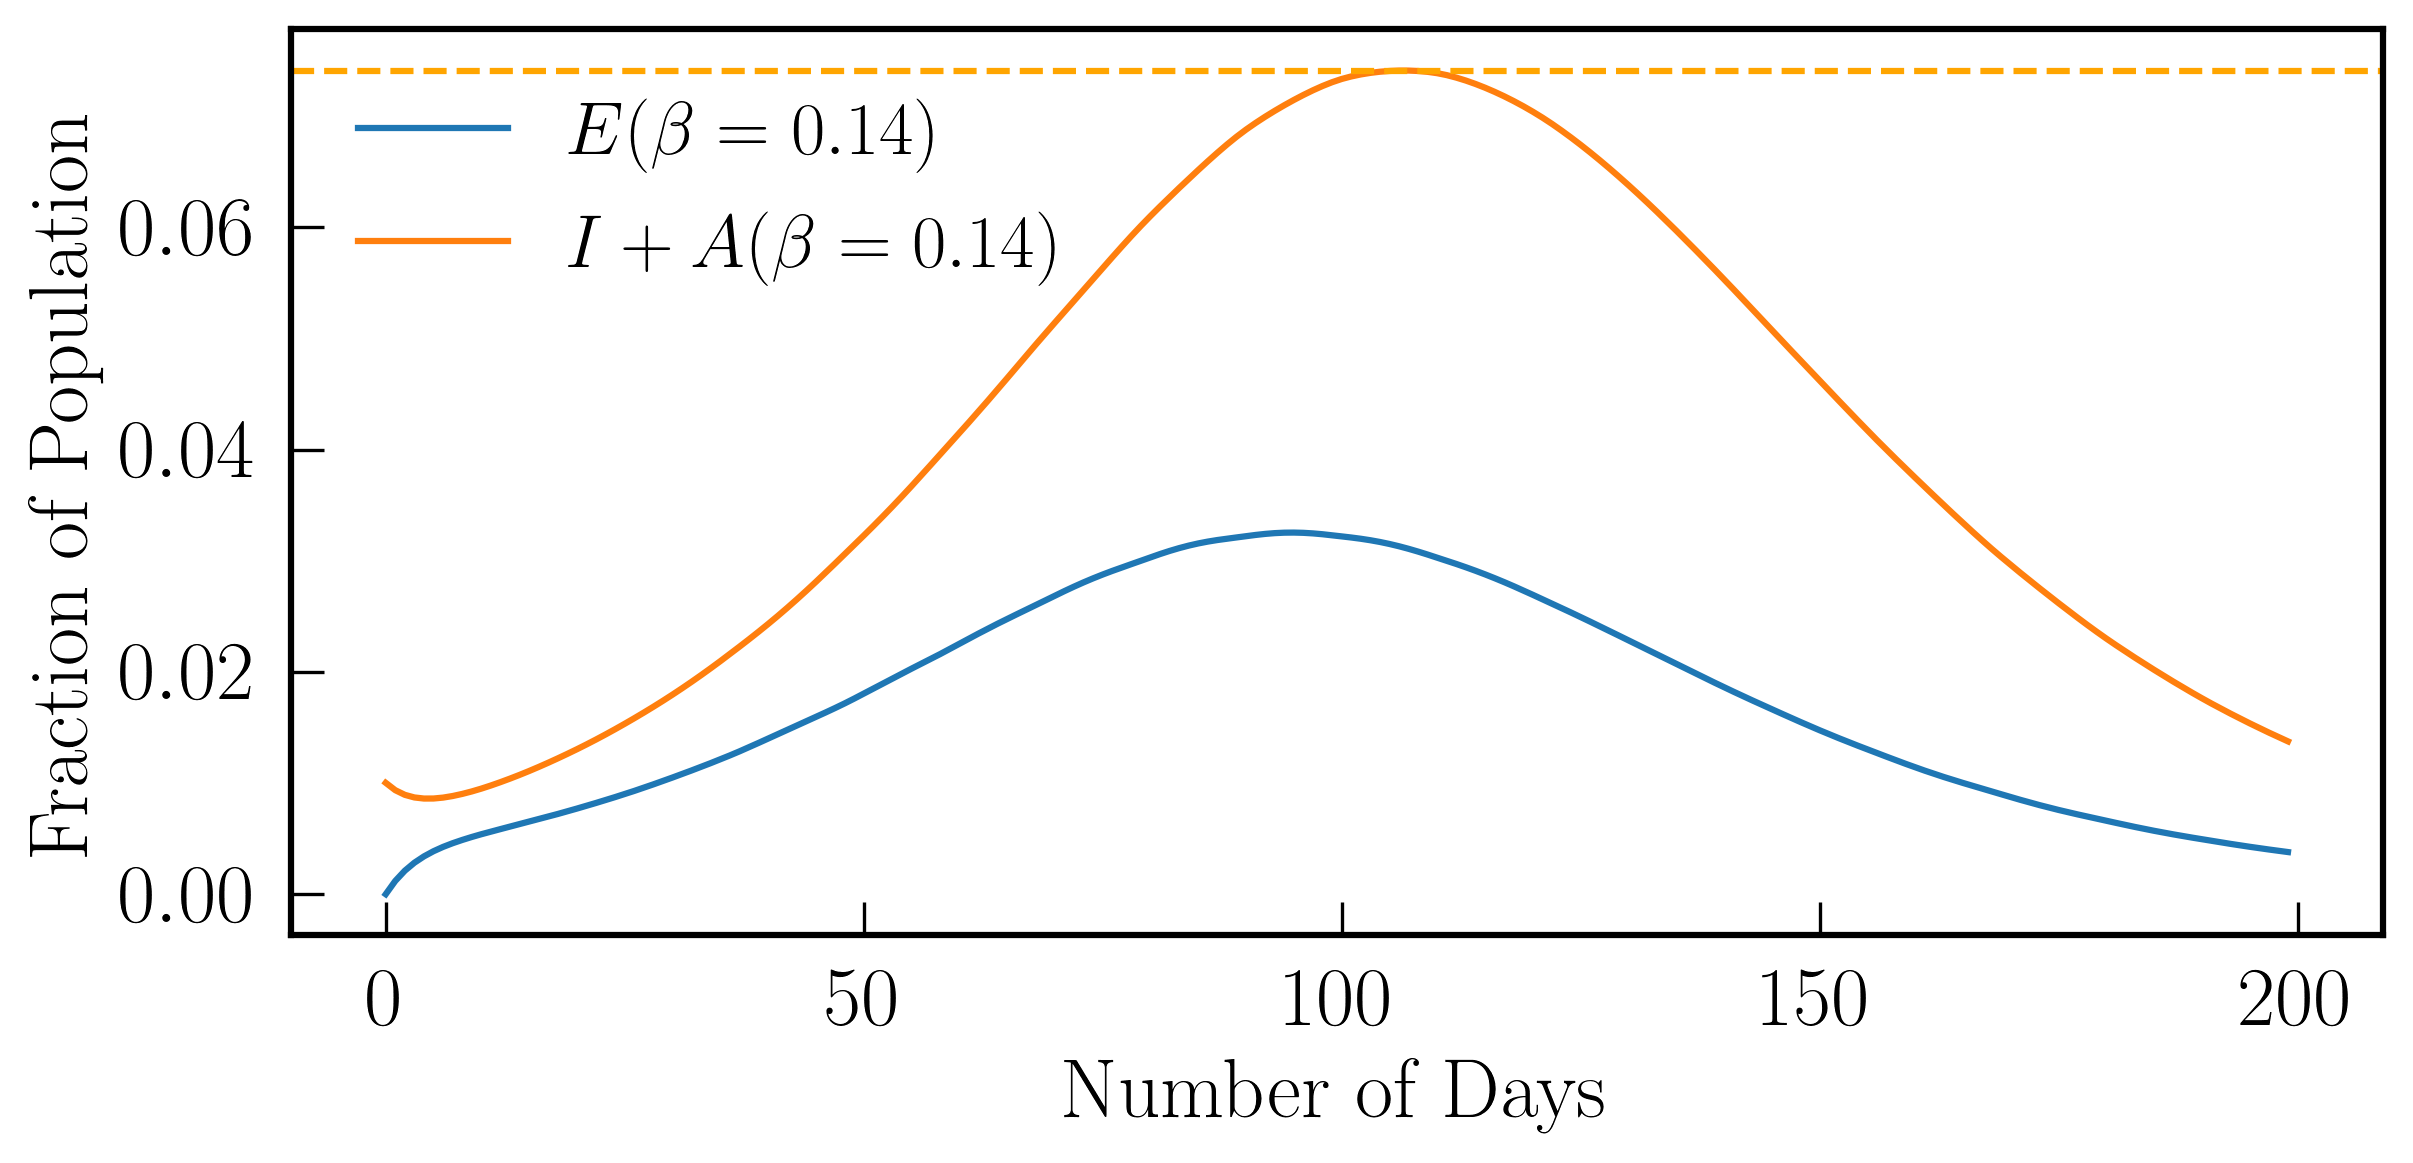

In [42]:
# pl.plot(t_eval, sol['y'][0, :] / N, label = r'$S$')
pl.plot(t_eval, sol['y'][1, :] / N, label = r'$E(\beta = 0.14)$')
pl.plot(t_eval, (sol['y'][2, :] + sol['y'][3, :]) / N, label = r'$I+A(\beta = 0.14)$')
pl.axhline(((sol['y'][2, :]).max()+(sol['y'][3, :]).max()) / N, 0, t_final, color = 'orange', linestyle = '--')
# pl.plot(t_eval, sol2['y'][1, :] / N, label = r'$E(\beta = 0.1)$')
# pl.plot(t_eval, sol2['y'][2, :] / N, label = r'$I(\beta = 0.1)$')
# pl.axhline((sol2['y'][2, :]).max() / N, 0, t_final, color = 'C3', linestyle = '--')
# pl.plot(t_eval, sol['y'][3, :] / N, label = r'$F$')
# pl.plot(t_eval, sol['y'][4, :] / N, label = r'$R$')
pl.xlabel('Number of Days')
pl.ylabel('Fraction of Population')
pl.legend(frameon = False, fontsize = 18)
pl.savefig('plot.png', bbox_inches = 'tight')

In [65]:
beta = 0.14
sol  = solve_ivp(SEIRS, (0, 50), init, t_eval = np.arange(0, 51))
beta = 0.10
sol2 = solve_ivp(SEIRS, (50, t_final), sol['y'][:, -1], t_eval = np.arange(51, t_final))
beta = 0.14
sol3 = solve_ivp(SEIRS, (0, t_final), init, t_eval = t_eval)

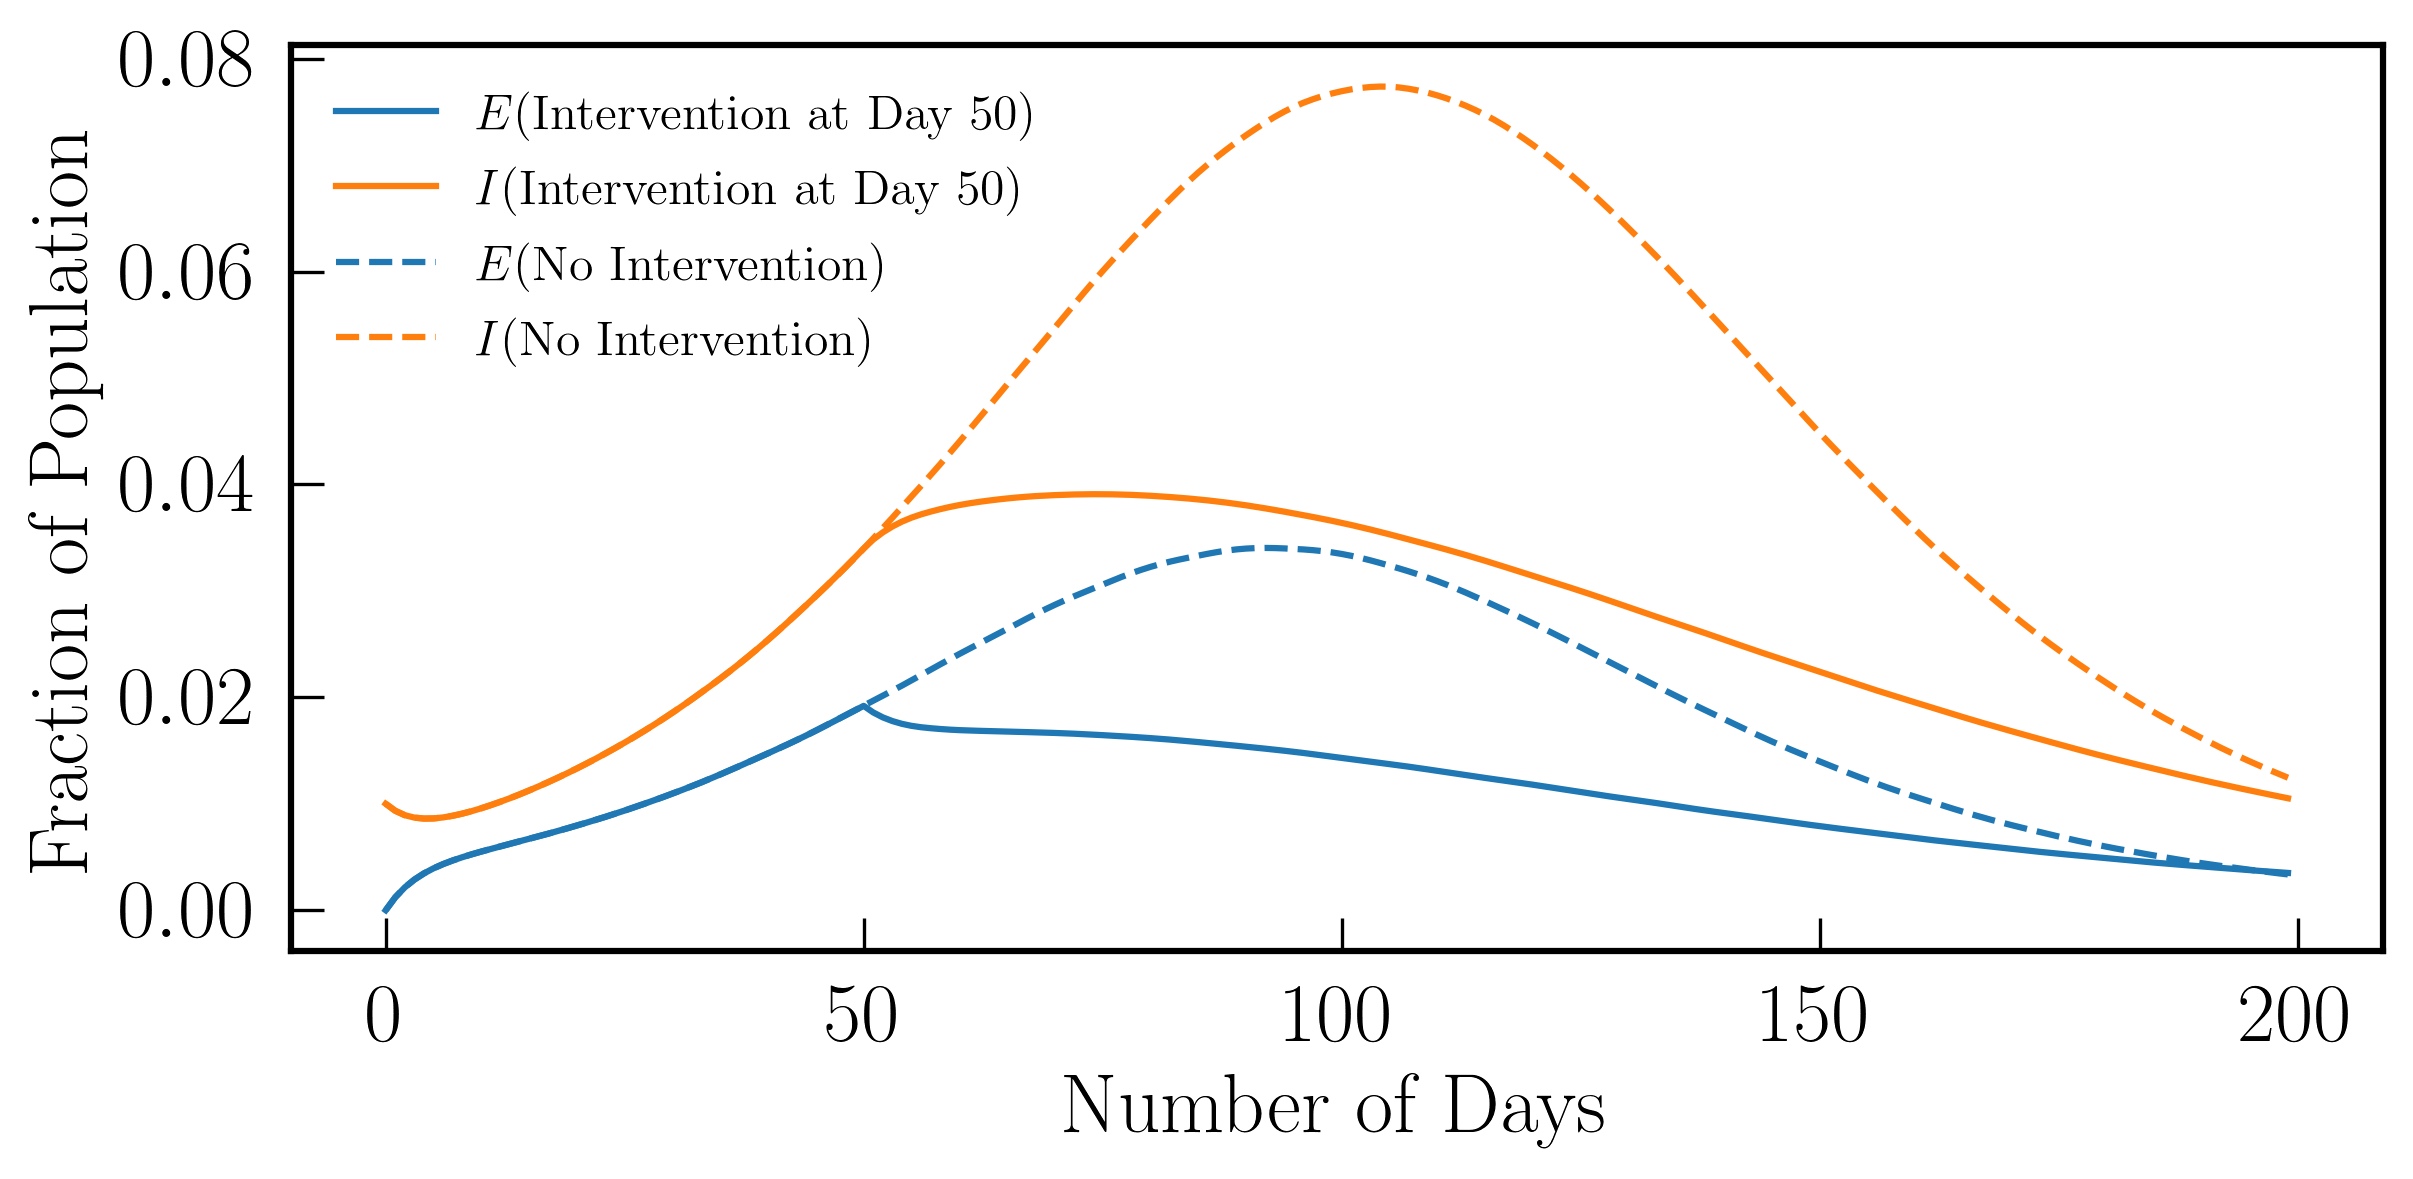

In [72]:
# pl.plot(t_eval, sol['y'][0, :] / N, label = r'$S$')
pl.plot(t_eval, np.append(sol['y'][1, :], sol2['y'][1, :]) / N, label = r'$E$(Intervention at Day 50)')
pl.plot(t_eval, np.append(sol['y'][2, :], sol2['y'][2, :]) / N, label = r'$I$(Intervention at Day 50)')
pl.plot(t_eval, sol3['y'][1, :] / N, linestyle = '--', color = 'C0', label = r'$E$(No Intervention)')
pl.plot(t_eval, sol3['y'][2, :] / N, linestyle = '--', color = 'C1', label = r'$I$(No Intervention)')
# pl.plot(t_eval, sol['y'][3, :] / N, label = r'$F$')
# pl.plot(t_eval, sol['y'][4, :] / N, label = r'$R$')
pl.xlabel('Number of Days')
pl.ylabel('Fraction of Population')
pl.legend(frameon = False, fontsize = 12)
pl.savefig('plot2.png', bbox_inches = 'tight')